In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
import time

# 1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course.

Machine learning as a set of tools for making inferences and predictions from data; it learns patterns from existing data and applies it to new data . ML should be used to analyze data and learn to predict the outcomes and identify trends based on input data, such as predicting when it will snow. ML takes a combonation of inputs that causes snow and makes a prediction. Do not use ML to less complex problems.

# 2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. 

In [2]:
loan = pd.read_csv('loans_full_schema.csv')
loan


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


#### Technique 1: Cleaning the data by removing null values

In [3]:
# Exploring the data

# .info() will show me the dtypes and how many non-null values are present in each column
print(loan.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [4]:
# converting amount of missing values into a percentage

total= loan.isnull().sum().sort_values(ascending=False)
percent= (loan.isnull().sum()/loan.isnull().count()).sort_values(ascending=False)*100

missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data

#100* loan.isnull().sum()/len(loan)
#loan.isnull().sum()

,Total,Percent
verification_income_joint,8545,85.45
debt_to_income_joint,8505,85.05
annual_income_joint,8505,85.05
months_since_90d_late,7715,77.15
months_since_last_delinq,5658,56.58
months_since_last_credit_inquiry,1271,12.71
emp_title,833,8.33
emp_length,817,8.17
num_accounts_120d_past_due,318,3.18
debt_to_income,24,0.24


In [5]:
# drop columns that have more than 50% of NaN. Also dropping emp_title since there are over 4,000; any relationship 
# we might observe might be due to confounding relationships


loan2 = loan.drop(["emp_title", "verification_income_joint", "debt_to_income_joint", "annual_income_joint", "months_since_90d_late",
                   "months_since_last_delinq",], axis=1)
loan2

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,28,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,30,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,31,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,4,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,22,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,TX,RENT,108000.0,Source Verified,22.28,0,2008,5,44,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,1994,1,28,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,2004,0,18,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,1999,1,38,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [6]:
#impute missing values

#check which columns still have missing values
loan2.isnull().sum()


emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
delinq_2y                              0
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1271
num_satisfactory_accounts              0
num_accounts_120d_past_due           318
num_accounts_30d_past_due              0
num_active_debit_accounts              0
total_debit_limi

In [7]:
#still missing - emp_length, debt_to_income, months_since_last_credit_inquiry, num_accounts_120d_past_due

#fill missing emp_length with 0
loan2["emp_length"]= loan2["emp_length"].fillna(0)
#fill missing debt_to_income with mode value
loan2["debt_to_income"] = loan2["debt_to_income"].fillna(loan2["debt_to_income"].mode()[0])
# months_since_last_credit_injury with mode value
loan2["months_since_last_credit_inquiry"] = loan2["months_since_last_credit_inquiry"].fillna(loan2["months_since_last_credit_inquiry"].mode()[0])

loan2["num_accounts_120d_past_due"] = loan2["num_accounts_120d_past_due"].fillna(loan2["num_accounts_120d_past_due"].mode()[0])


In [8]:
#checking for null values
loan2.isnull().sum()

emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc_accounts               0
num_open_cc_

#### Technique2: Convert Categorical Data

In [9]:
# Categorical Variables
loan2.select_dtypes(['object']).columns

Index(['state', 'homeownership', 'verified_income', 'loan_purpose',
       'application_type', 'grade', 'sub_grade', 'issue_month', 'loan_status',
       'initial_listing_status', 'disbursement_method'],
      dtype='object')

In [10]:
#using labelencoder to 
le = LabelEncoder()

#loan2['state'] = le.fit_transform(loan2['state'].values)
loan2['homeownership'] = le.fit_transform(loan2['homeownership'].values)
loan2['verified_income'] = le.fit_transform(loan2['verified_income'].values)
loan2['loan_purpose'] = le.fit_transform(loan2['loan_purpose'].values)
loan2['grade'] = le.fit_transform(loan2['grade'].values)
loan2['sub_grade'] = le.fit_transform(loan2['sub_grade'].values)
loan2['issue_month'] = le.fit_transform(loan2['issue_month'].values)
loan2['loan_status'] = le.fit_transform(loan2['loan_status'].values)
loan2['initial_listing_status'] = le.fit_transform(loan2['initial_listing_status'].values)
loan2['disbursement_method'] = le.fit_transform(loan2['disbursement_method'].values)



#### Technique3: Standardization/Normalization 

In [10]:
# make continous data look normally distributed
loan2.mean()

/var/folders/t2/8_yszszj5vz4xyg1fsy_1rlr0000gn/T/ipykernel_3852/333975001.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  loan2.mean()


emp_length                               5.445800
homeownership                            0.906900
annual_income                        79222.148412
verified_income                          0.869600
debt_to_income                          19.261852
delinq_2y                                0.216000
earliest_credit_line                  2001.290000
inquiries_last_12m                       1.958200
total_credit_lines                      22.679600
open_credit_lines                       11.404400
total_credit_limit                  183606.230400
total_credit_utilized                51049.063100
num_collections_last_12m                 0.013800
num_historical_failed_to_pay             0.167100
current_accounts_delinq                  0.000100
total_collection_amount_ever           184.334000
current_installment_accounts             2.663600
accounts_opened_24m                      4.376100
months_since_last_credit_inquiry         6.534800
num_satisfactory_accounts               11.379600


In [11]:
standardized_df = (loan2-loan2.mean())/loan2.std()
standardized_df

/var/folders/t2/8_yszszj5vz4xyg1fsy_1rlr0000gn/T/ipykernel_3852/1438739445.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  standardized_df = (loan2-loan2.mean())/loan2.std()


,account_never_delinq_percent,accounts_opened_24m,annual_income,application_type,balance,current_accounts_delinq,current_installment_accounts,debt_to_income,delinq_2y,disbursement_method,...,state,sub_grade,tax_liens,term,total_collection_amount_ever,total_credit_limit,total_credit_lines,total_credit_utilized,total_debit_limit,verified_income
0,-0.191041,0.197525,0.166494,NaN,1.260160,-0.01,-0.226069,-0.083365,-0.315947,-0.277694,...,NaN,0.485612,-0.072914,1.516608,0.482991,-0.601234,0.447640,-0.228986,-0.611867,1.495347
1,0.584487,2.097111,-0.605894,NaN,-0.984243,-0.01,-0.907410,-0.947076,-0.315947,-0.277694,...,NaN,0.144041,-0.072914,-0.659300,-0.083546,-0.825049,0.615913,-0.871195,-0.408632,-1.150348
2,-0.125503,2.730307,-0.605894,NaN,-1.267922,-0.01,-0.566740,0.125738,-0.315947,-0.277694,...,NaN,0.997968,-0.072914,-0.659300,0.112249,-0.849603,0.700050,-0.653453,-0.867793,0.172499
3,0.584487,-1.068865,-0.760372,NaN,0.440997,-0.01,-0.566740,-0.606120,-0.315947,-0.277694,...,NaN,-1.222244,1.611007,-0.659300,-0.083546,-0.843170,-1.571637,-0.858592,-0.299487,-1.150348
4,0.584487,0.514123,-0.683133,NaN,0.699603,-0.01,-0.566740,2.577027,-0.315947,-0.277694,...,NaN,0.485612,-0.072914,-0.659300,-0.083546,-0.606329,-0.057179,0.031190,0.201075,1.495347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.584487,1.147318,0.444553,NaN,0.715277,-0.01,0.114602,0.200988,-0.315947,-0.277694,...,NaN,-1.051458,-0.072914,-0.659300,-0.083546,0.083081,1.793825,0.501782,0.648946,0.172499
9996,-1.370717,-1.385463,0.645374,NaN,-0.533037,-0.01,0.114602,0.873577,5.534917,-0.277694,...,NaN,1.339539,-0.072914,-0.659300,-0.083546,1.057677,0.447640,0.941928,0.031712,1.495347
9997,-2.452086,-0.119072,-0.188805,NaN,1.320553,-0.01,0.114602,1.731296,2.609485,-0.277694,...,NaN,2.022681,-0.072914,-0.659300,-0.083546,0.867630,-0.393725,0.827268,-0.468850,1.495347
9998,0.584487,-0.752268,0.012016,NaN,0.708431,-0.01,-0.226069,-0.484255,-0.315947,-0.277694,...,NaN,-1.563815,-0.072914,-0.659300,-0.083546,0.590882,1.289006,-0.436419,0.701636,0.172499


In [12]:
#view mean of each column
standardized_df.mean()



account_never_delinq_percent        2.817302e-16
accounts_opened_24m                -3.979039e-17
annual_income                       8.242296e-17
application_type                             NaN
balance                            -2.415845e-17
current_accounts_delinq            -1.776357e-18
current_installment_accounts       -7.887024e-17
debt_to_income                      1.669775e-16
delinq_2y                           3.304024e-17
disbursement_method                -2.273737e-17
earliest_credit_line                4.671818e-15
emp_length                         -2.309264e-17
grade                               8.668621e-17
homeownership                      -1.051603e-16
initial_listing_status              7.815970e-18
inquiries_last_12m                  1.101341e-17
installment                         1.392664e-16
interest_rate                      -2.273737e-17
issue_month                         5.790923e-17
loan_amount                        -4.547474e-17
loan_purpose        

In [13]:
# view the standard deviation
standardized_df.std()

account_never_delinq_percent        1.0
accounts_opened_24m                 1.0
annual_income                       1.0
application_type                    NaN
balance                             1.0
current_accounts_delinq             1.0
current_installment_accounts        1.0
debt_to_income                      1.0
delinq_2y                           1.0
disbursement_method                 1.0
earliest_credit_line                1.0
emp_length                          1.0
grade                               1.0
homeownership                       1.0
initial_listing_status              1.0
inquiries_last_12m                  1.0
installment                         1.0
interest_rate                       1.0
issue_month                         1.0
loan_amount                         1.0
loan_purpose                        1.0
loan_status                         1.0
months_since_last_credit_inquiry    1.0
num_accounts_120d_past_due          NaN
num_accounts_30d_past_due           1.0


# 3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.


Each square shows the correlation between the variables on each axis. The close to 1 the correlation is the more positively correlated they are. A correlation closer to -1 means one variable will decrease as the other increases. 

The diagonals are all 1(cream color) because those squares are correlating each variable to itself (so it's a perfect correlation). The plot is symmetrical about the diagonal since the same two variables are being paired together in those squares.

There are a few variables that are perfectly correlated or highly correlated with each other. Some are: num_satisfactory_haccounts & open_credit_lines, num_accounts_30d_past_due & current_accounts_delinq, balance & loan amount.


In [14]:
#check correlation between loan_amount and all otehr ID variables
corrM = loan2.corr()
corrM


,emp_length,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_length,1.000000,-0.192843,0.149330,-0.006632,-0.004120,0.012520,-0.129035,0.017820,0.135199,0.083867,...,-0.036758,-0.003523,-0.002070,0.028431,-0.022676,0.109452,0.042122,0.033059,0.074080,-0.006868
homeownership,-0.192843,1.000000,-0.171023,-0.075553,-0.074223,-0.039036,0.210754,-0.115753,-0.238224,-0.159389,...,0.084081,-0.013664,0.014787,-0.055500,0.004888,-0.152425,-0.063296,-0.053722,-0.081002,0.022764
annual_income,0.149330,-0.171023,1.000000,0.016817,-0.175986,0.052236,-0.156001,0.090119,0.210163,0.176788,...,-0.105073,-0.004984,0.015214,0.050766,0.011331,0.280170,0.162005,0.141893,0.174154,-0.005318
verified_income,-0.006632,-0.075553,0.016817,1.000000,0.103516,0.011546,0.028718,0.083960,0.000592,0.017051,...,0.246353,0.023514,0.043797,-0.004461,-0.022389,0.205189,0.089805,0.059193,0.242589,0.023941
debt_to_income,-0.004120,-0.074223,-0.175986,0.103516,1.000000,-0.027411,-0.090660,0.025039,0.199884,0.217677,...,0.143781,-0.012545,-0.026193,-0.009482,0.008470,0.065166,-0.003842,-0.019960,0.120510,-0.009886
delinq_2y,0.012520,-0.039036,0.052236,0.011546,-0.027411,1.000000,-0.078109,0.003152,0.068040,0.013050,...,0.094456,0.007246,0.006614,-0.032595,-0.025903,-0.031440,-0.004490,-0.006857,0.017165,-0.009404
earliest_credit_line,-0.129035,0.210754,-0.156001,0.028718,-0.090660,-0.078109,1.000000,0.042745,-0.294621,-0.174322,...,0.110844,0.016285,0.005978,-0.024131,0.013054,-0.107508,-0.040281,-0.036125,-0.037027,0.020522
inquiries_last_12m,0.017820,-0.115753,0.090119,0.083960,0.025039,0.003152,0.042745,1.000000,0.210433,0.186462,...,0.136236,-0.002474,0.032905,-0.033946,-0.018753,0.026550,0.032823,0.023155,0.077204,0.022404
total_credit_lines,0.135199,-0.238224,0.210163,0.000592,0.199884,0.068040,-0.294621,0.210433,1.000000,0.756209,...,-0.048460,-0.004750,-0.010198,0.035399,0.019659,0.158414,0.082315,0.068932,0.112342,-0.030621
open_credit_lines,0.083867,-0.159389,0.176788,0.017051,0.217677,0.013050,-0.174322,0.186462,0.756209,1.000000,...,-0.014021,-0.002342,-0.026291,0.017433,0.044447,0.145993,0.049598,0.035624,0.112090,-0.025176


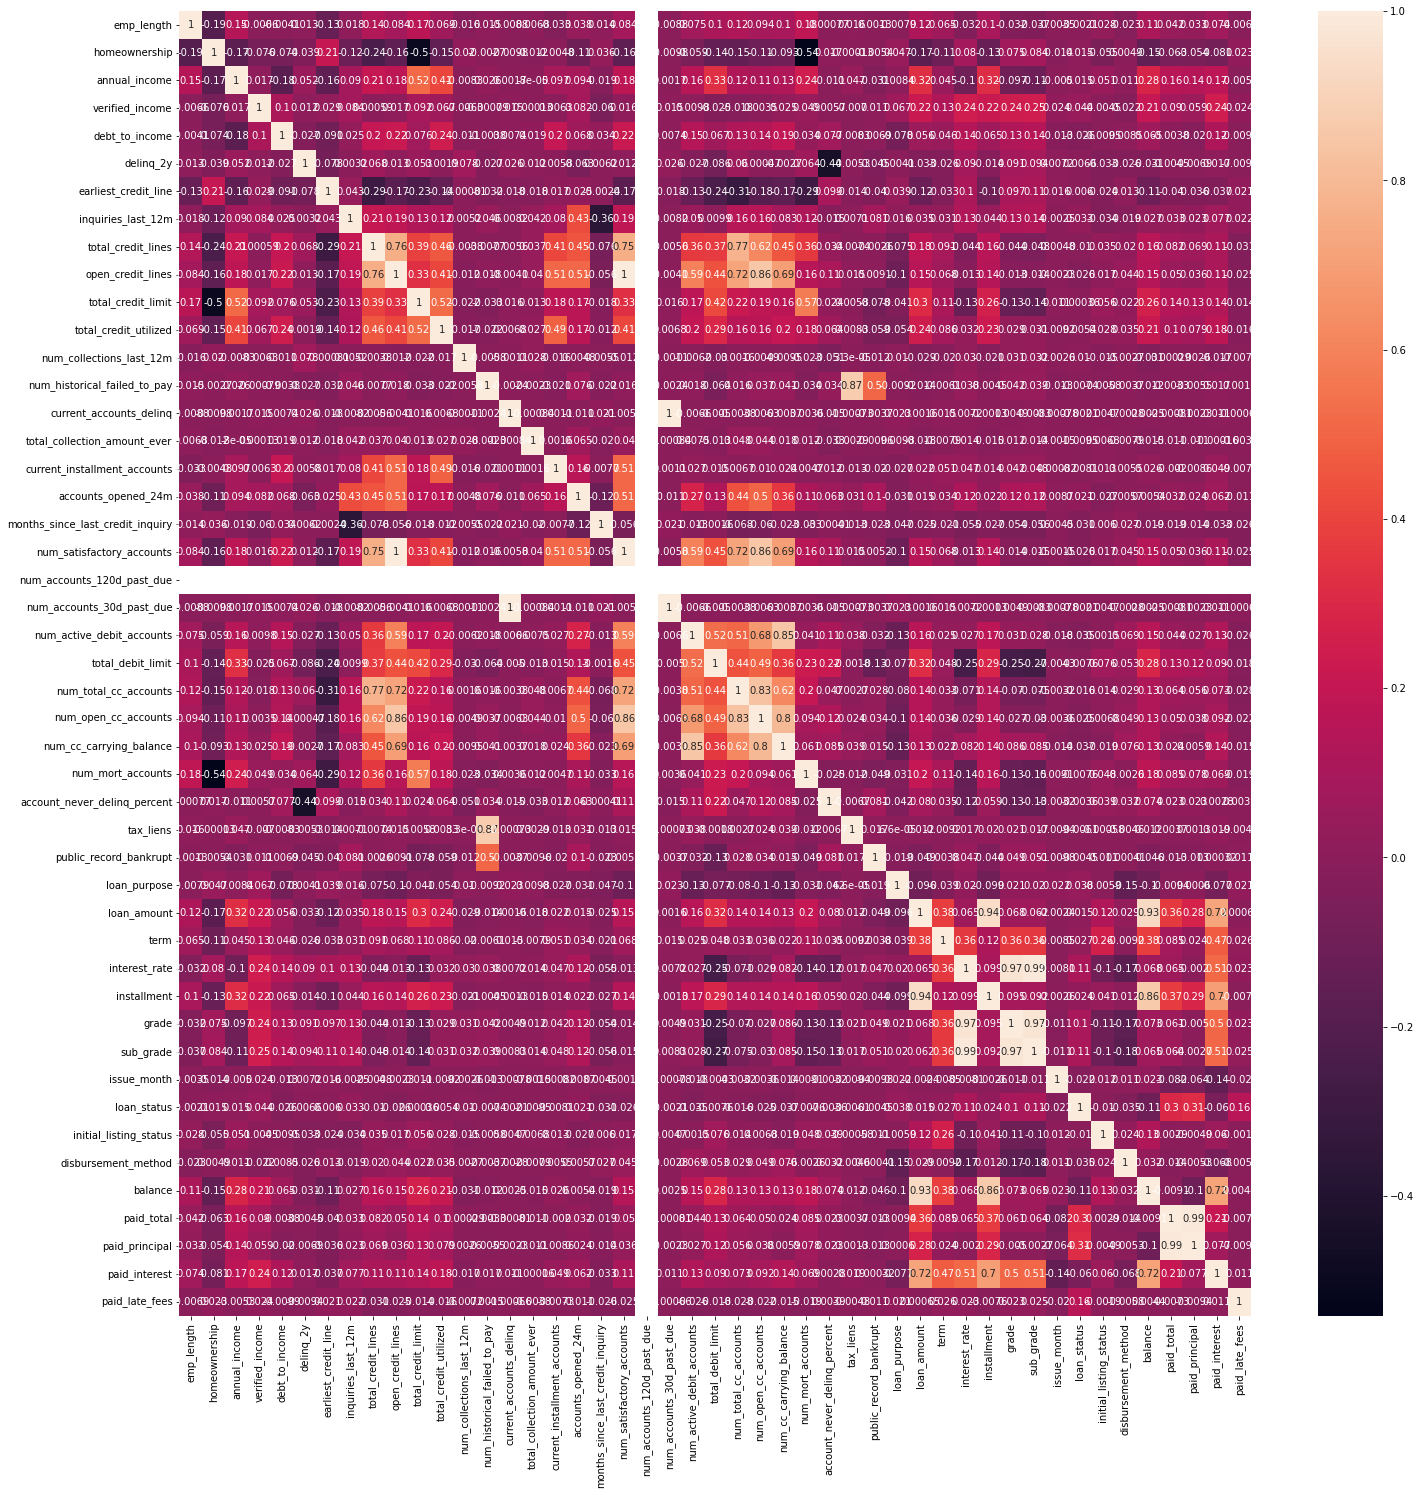

In [16]:
# get visual of corr matrix

import seaborn as sn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(24,24))
sn.heatmap(corrM, annot=True)
plt.show()


# 4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes.

In [14]:
print(loan2["loan_amount"].value_counts().count())
print(loan2["loan_amount"].max())
print(loan2["loan_amount"].min())

612
40000
1000


<AxesSubplot:ylabel='Frequency'>

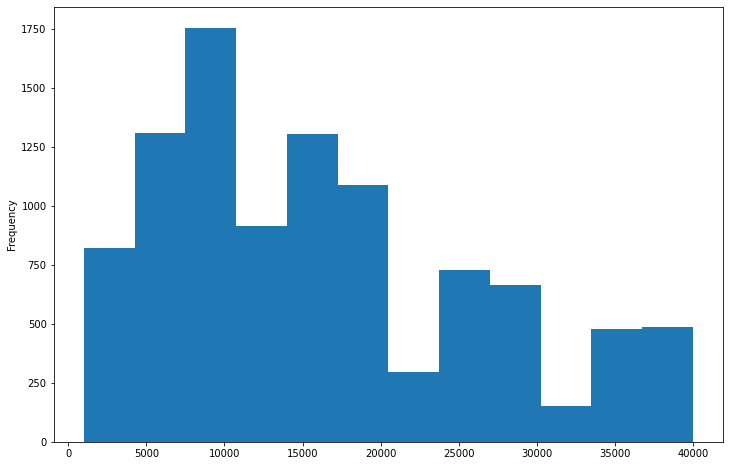

In [15]:
# bin size is 12. It's standard practice to chose a bine size between 5- 20. The larger the dataset, the higher the bin
#There are 612 different loan amounts, so divided it up evenly by choosing 12 bins

fig, ax = plt.subplots(figsize=(12,8))
loan2["loan_amount"].plot(kind='hist', bins = 12)

# 5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 

a.	Is there a better way to do this than with a lambda? 

b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 


#### Answer to a and b:
Using np.where is more performant since it has a quicker execution time. Loops are being used under the hood for lambda, which takes a bit longer to execute than the vectorized alternative with np.where

In [11]:
loan2["state"].unique()

array(['NJ', 'HI', 'WI', 'PA', 'CA', 'KY', 'MI', 'AZ', 'NV', 'IL', 'FL',
       'SC', 'CO', 'TN', 'TX', 'VA', 'NY', 'GA', 'MO', 'AR', 'MD', 'NC',
       'NE', 'WV', 'NH', 'UT', 'DE', 'MA', 'OR', 'OH', 'OK', 'SD', 'MN',
       'AL', 'WY', 'LA', 'IN', 'KS', 'MS', 'WA', 'ME', 'VT', 'CT', 'NM',
       'AK', 'MT', 'RI', 'ND', 'DC', 'ID'], dtype=object)

#### Using np.where to add region column. It will assign the states to the specified region if the condition is met.

In [18]:
start = time.time()
# setting up the regions
Pacific = ['HI', 'CA', 'NV', 'OR', 'WY', 'ID']

Plains = ['CO', 'AR', 'NE', 'UT', 'OK', 'SD', 'WA', 'NM', 'MT', 'ND']

Midwest = ['WI', 'MI', 'IL', 'MO', 'OH', 'MN', 'IN', 'KS', 'AK']

Northeast = ['NJ', 'PA', 'NY','MD', 'NH', 'DE', 'MA', 'ME', 'VT', 'CT', 'RI', 'DC']
 
South = ['KY', 'AZ', 'FL', 'SC', 'TN', 'TX', 'VA', 'GA', 'NC', 'WV', 'AL', 'LA', 'MS']


loan2['Region'] = np.where(loan2['state'].isin(Pacific), 'Pacific',
                       np.where(loan2['state'].isin(Plains), 'Plains', 
                          np.where(loan2['state'].isin(Midwest), 'Midwest', 
                             np.where(loan2['state'].isin(Northeast),'Northeast',
                                np.where(loan2['state'].isin(South),'South', np.nan)))))

loan2.head()
end = time.time()
print(end-start)

0.014493942260742188


In [19]:
loan2.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Region,region2
0,3.0,NJ,0,90000.0,2,18.01,0,2001,6,28,...,1,1,0,27015.86,1999.33,984.14,1015.19,0.0,Northeast,Northeast
1,10.0,HI,2,40000.0,0,5.04,0,1996,1,30,...,1,1,0,4651.37,499.12,348.63,150.49,0.0,Pacific,Pacific
2,3.0,WI,2,40000.0,1,21.15,0,2006,4,31,...,1,0,0,1824.63,281.80,175.37,106.43,0.0,Midwest,Midwest
3,1.0,PA,2,30000.0,0,10.16,0,2007,0,4,...,1,1,0,18853.26,3312.89,2746.74,566.15,0.0,Northeast,Northeast
4,10.0,CA,2,35000.0,2,57.96,0,2008,7,22,...,1,1,0,21430.15,2324.65,1569.85,754.80,0.0,Pacific,Pacific


#### Using lambda to add region column

In [13]:
Pacific = ['HI', 'CA', 'NV', 'OR', 'WY', 'ID']

Plains = ['CO', 'AR', 'NE', 'UT', 'OK', 'SD', 'WA', 'NM', 'MT', 'ND']

Midwest = ['WI', 'MI', 'IL', 'MO', 'OH', 'MN', 'IN', 'KS', 'AK']

Northeast = ['NJ', 'PA', 'NY','MD', 'NH', 'DE', 'MA', 'ME', 'VT', 'CT', 'RI', 'DC']
 
South = ['KY', 'AZ', 'FL', 'SC', 'TN', 'TX', 'VA', 'GA', 'NC', 'WV', 'AL', 'LA', 'MS']



In [20]:
start = time.time()

loan2['region2'] = list(map(lambda x:'Pacific' if x in Pacific else ('Plains' if x in Plains else ('Midwest' if x in Midwest else ('Northeast' if x in Northeast else ('South')))), loan2['state']))

end = time.time()
print(end-start)

0.015686988830566406


In [21]:
loan2.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Region,region2
0,3.0,NJ,0,90000.0,2,18.01,0,2001,6,28,...,1,1,0,27015.86,1999.33,984.14,1015.19,0.0,Northeast,Northeast
1,10.0,HI,2,40000.0,0,5.04,0,1996,1,30,...,1,1,0,4651.37,499.12,348.63,150.49,0.0,Pacific,Pacific
2,3.0,WI,2,40000.0,1,21.15,0,2006,4,31,...,1,0,0,1824.63,281.80,175.37,106.43,0.0,Midwest,Midwest
3,1.0,PA,2,30000.0,0,10.16,0,2007,0,4,...,1,1,0,18853.26,3312.89,2746.74,566.15,0.0,Northeast,Northeast
4,10.0,CA,2,35000.0,2,57.96,0,2008,7,22,...,1,1,0,21430.15,2324.65,1569.85,754.80,0.0,Pacific,Pacific


# 6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

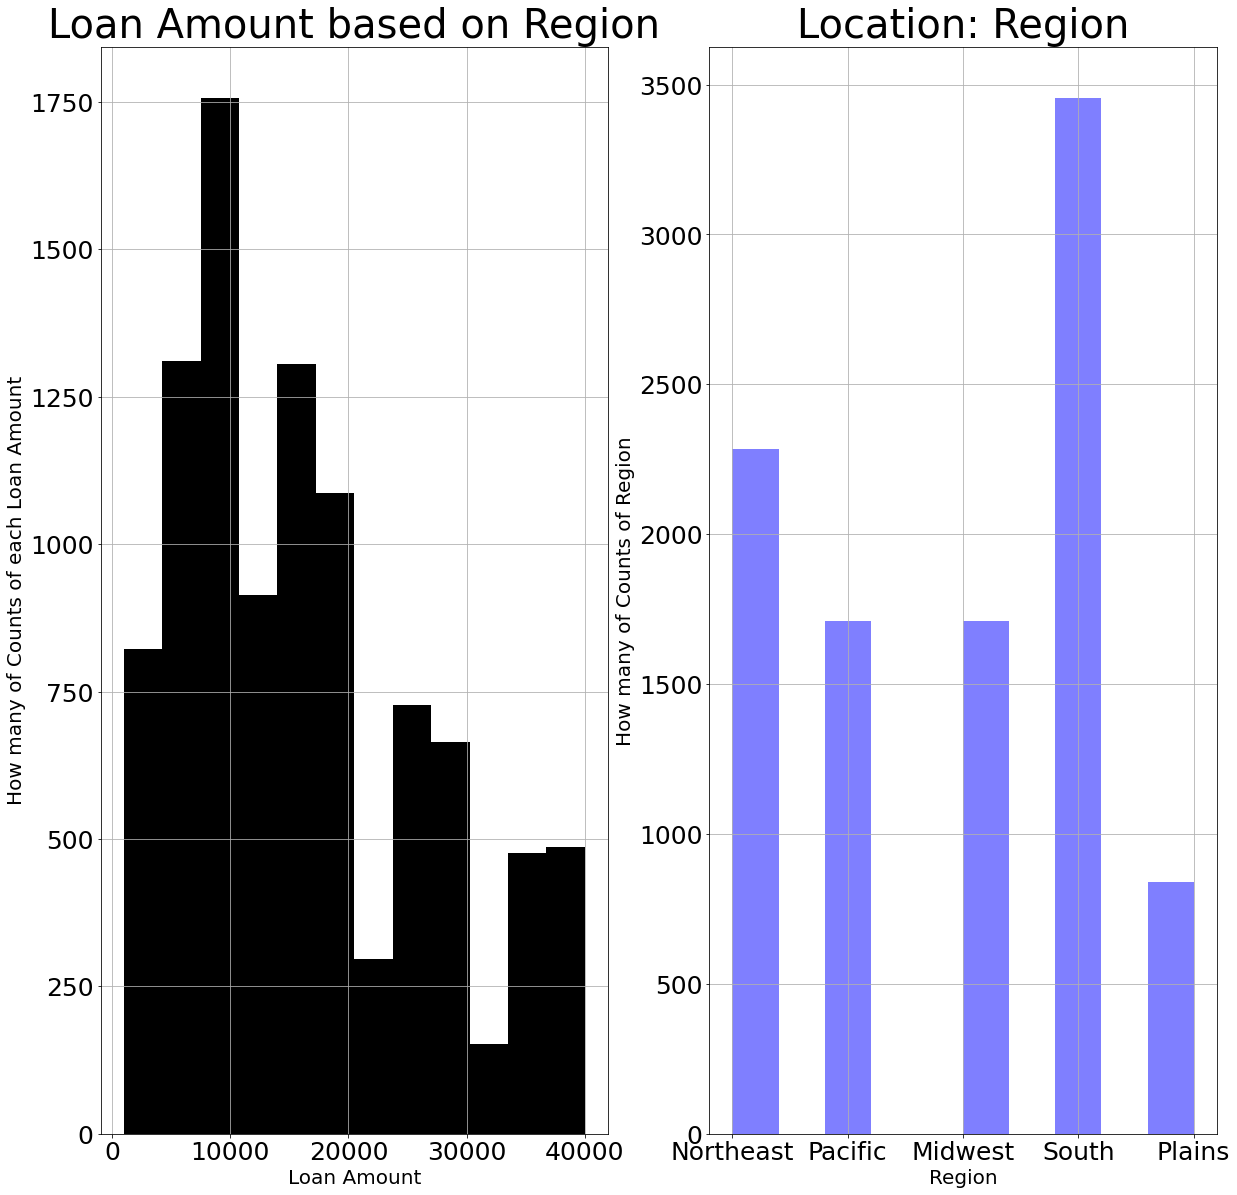

In [56]:
#Create histogram of reviews_per_month
plt.subplot(1, 2, 1)
loan2['loan_amount'].hist (bins = 12color="black", figsize=(20,20))

plt.title('Loan Amount based on Region', fontsize = 40)
plt.xlabel('Loan Amount', fontsize = 20)
plt.ylabel('How many of Counts of each Loan Amount', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=25)

#Create histogram of number_of_reviews
plt.subplot(1, 2, 2)
loan2['Region'].hist (color="blue", alpha=0.5, figsize=(20,20))


plt.title('Location: Region', fontsize = 40)
plt.xlabel('Region', fontsize = 20)
plt.ylabel('How many of Counts of Region', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=25)

#Show plot
plt.show()

Based on the histogram, the majority of people in this dataset recieve loans in the amount of $8,000 to $10,000. Loans in the amount of $5,000 to $15,000 are given out the most. 
Region: Based on the histogram for region, people who live in the South receive the most amount of loans. A deeper analysis would need to be done to check population size to see if more people live in the South region in comparison to the other regions. Also, demographics on the regions can provide further insight as to why the southern regions has a higher loan distribution.

# 7.	Think of some questions you want to ask our guests next week. You can ask them anything, just make sure its thoughtful. 

What advice do you have for someone making a career change into data science/analysis?
- How did you deal with self-doubt?

What is the best way can we leverage our skills from this course to get job in data science/analysis (with little to no data/statisitics background)?

What was your career path that led you to where you are now?

Did/do you deal with imposture syndrome?

What types of projects do you work on in your field and what skills are necessary to complete them? 

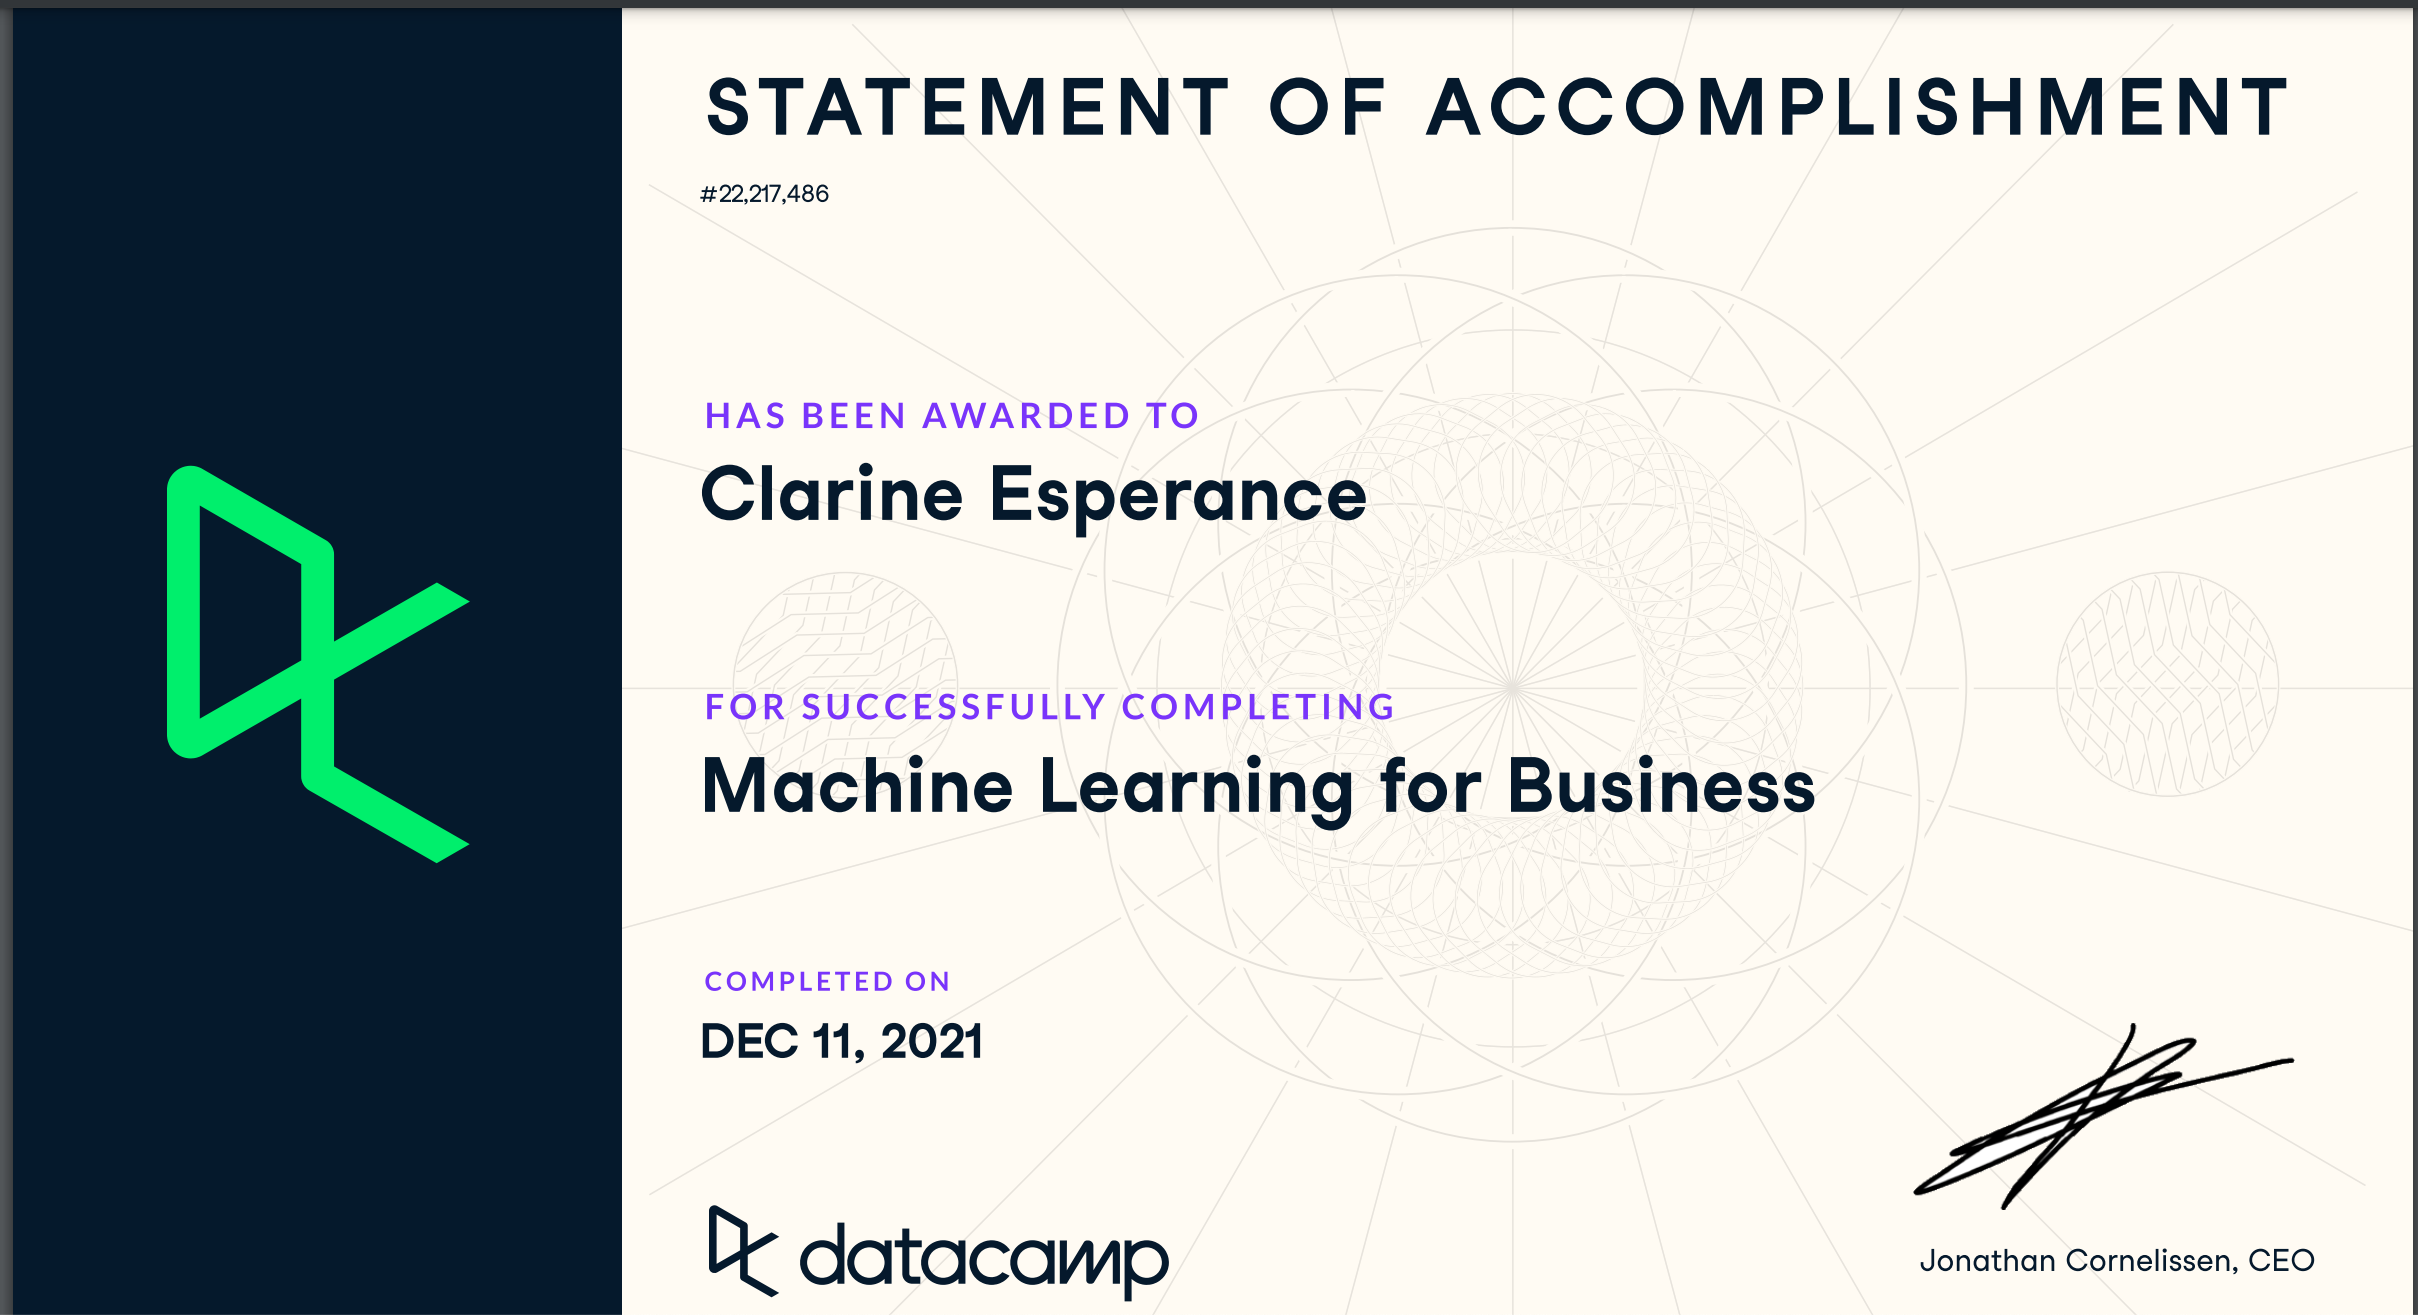

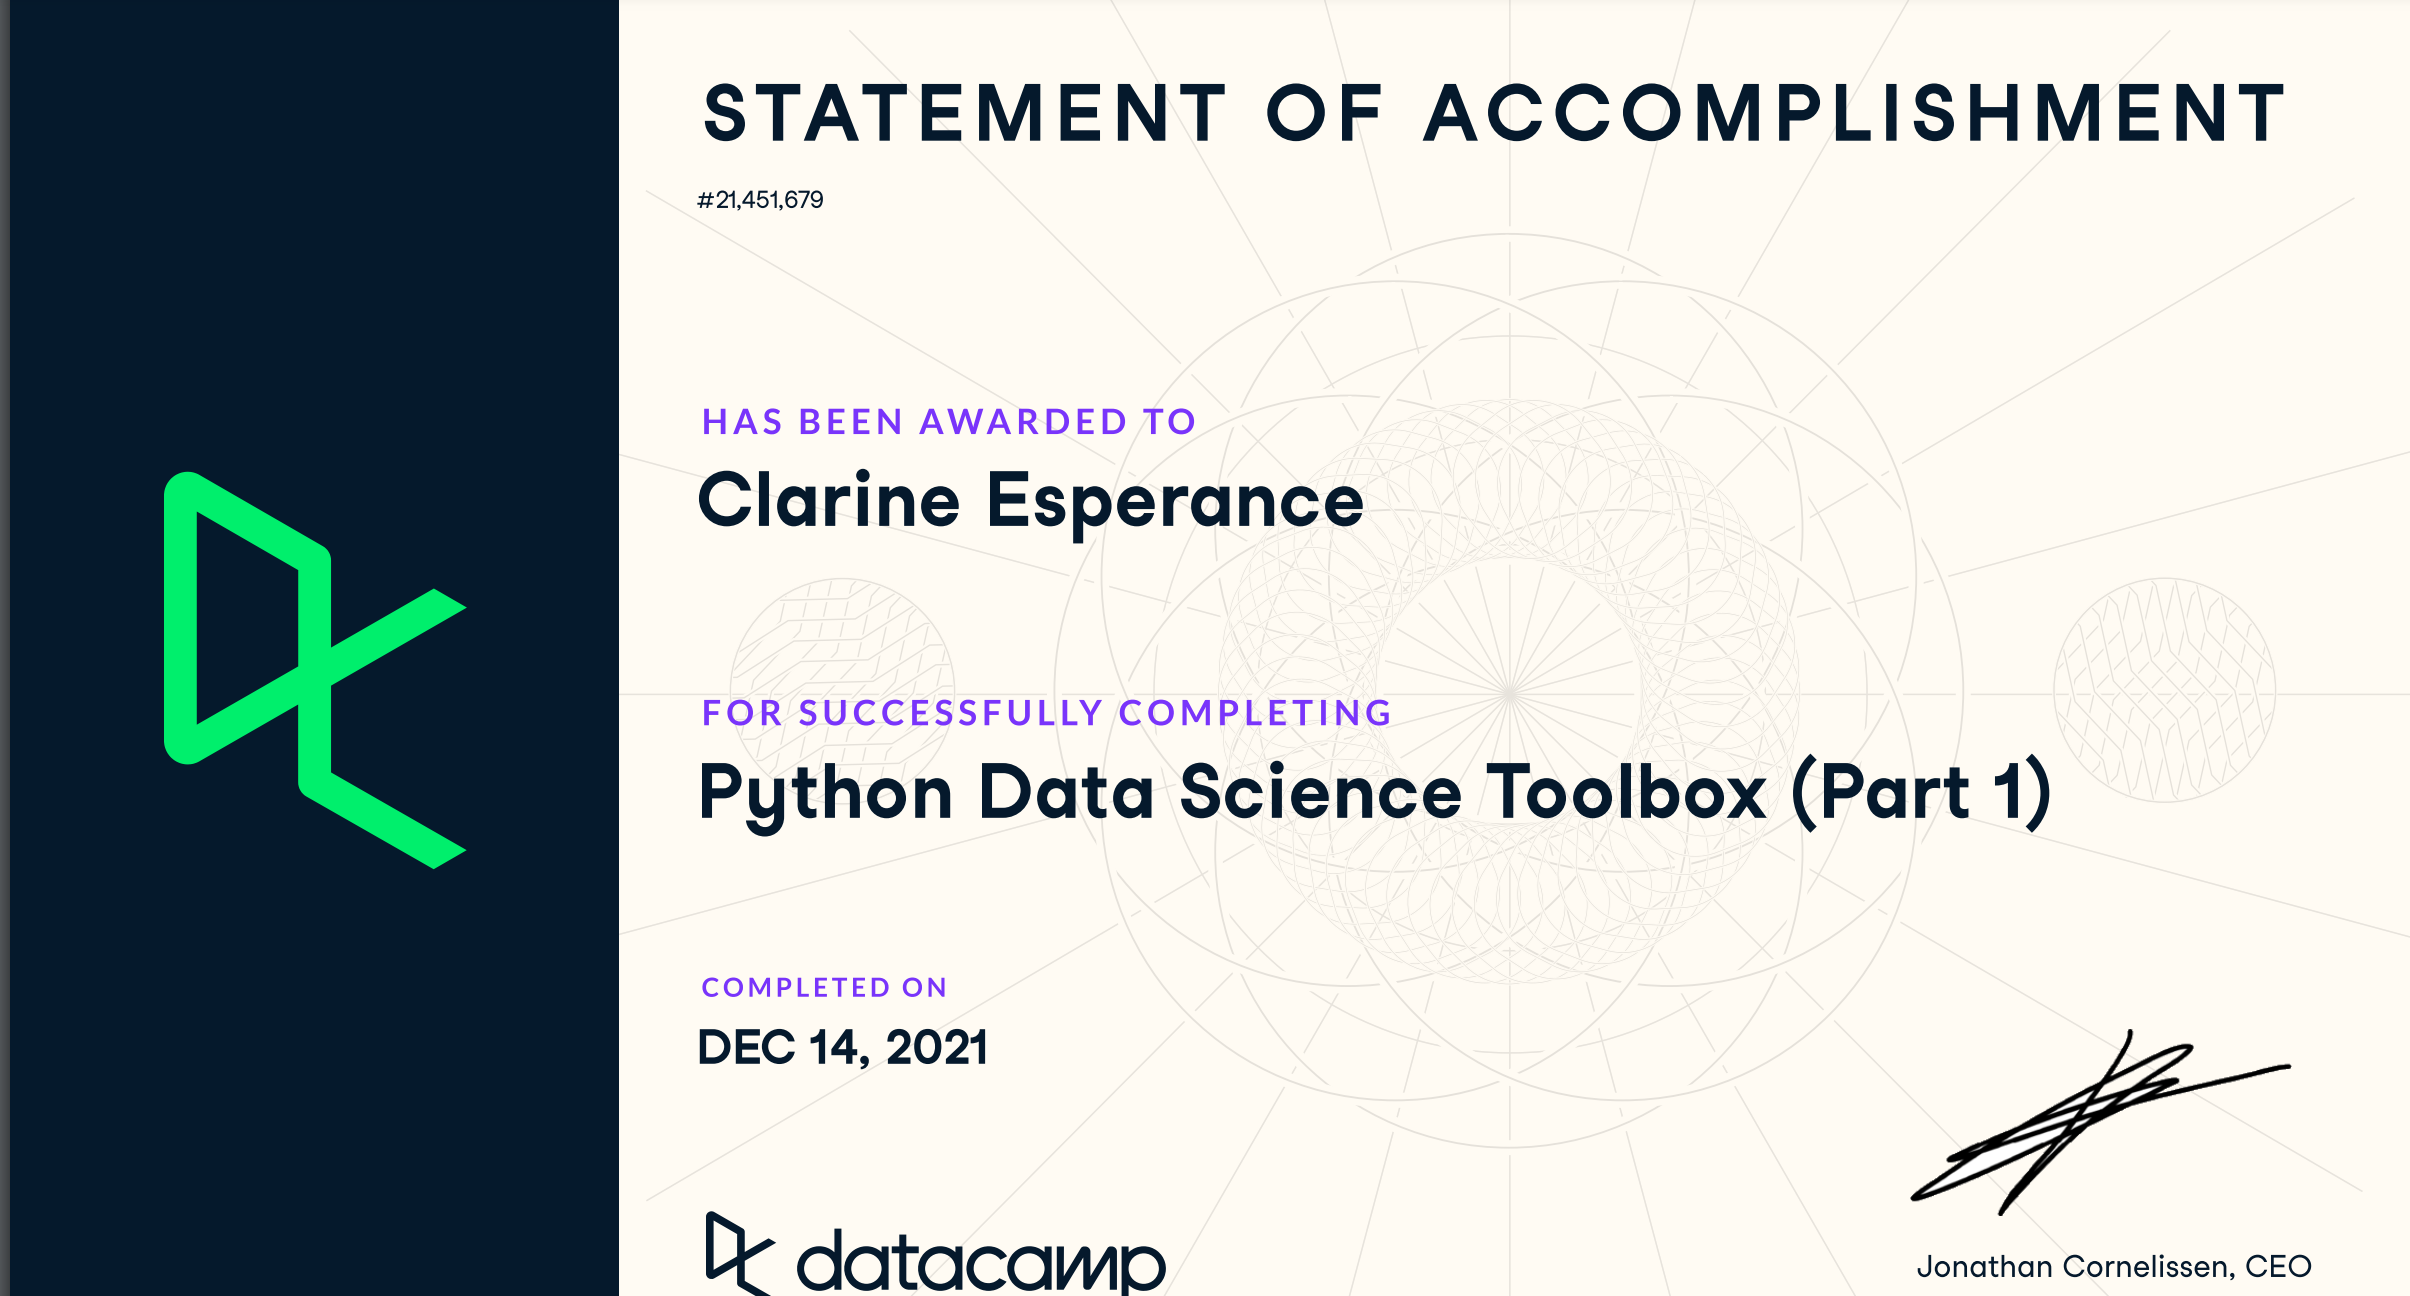